<a href="https://colab.research.google.com/github/Novita20/PCVK_GANJIL_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 11 - (Obejct Detction, Template Matching, Edge Detectiom, Corner Detectiom, Grid Detection, Contour Detection)**


**Nama    : Novita Dwi Rahmadani**

**Kelas   : TI-3F**

**NIM     : 2141710050**


==========================================
###**Pengayaan Materi KTP**






    1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

In [1]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# import library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


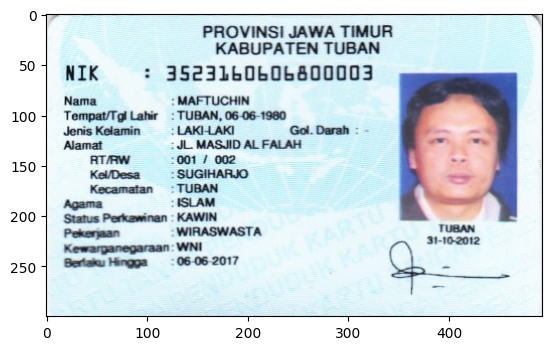

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/dataset/ktp/Salinan ktp3.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

    2.Muat 2 library berikut sebagai tahapan persiapan

In [13]:
import cv2
import os

    3.Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [25]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/dataset/ktp"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

    4.Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi


In [26]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

    5.Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [31]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

plt.show()

160.0 (636, 996)


    6.Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

160.0 (636, 996)


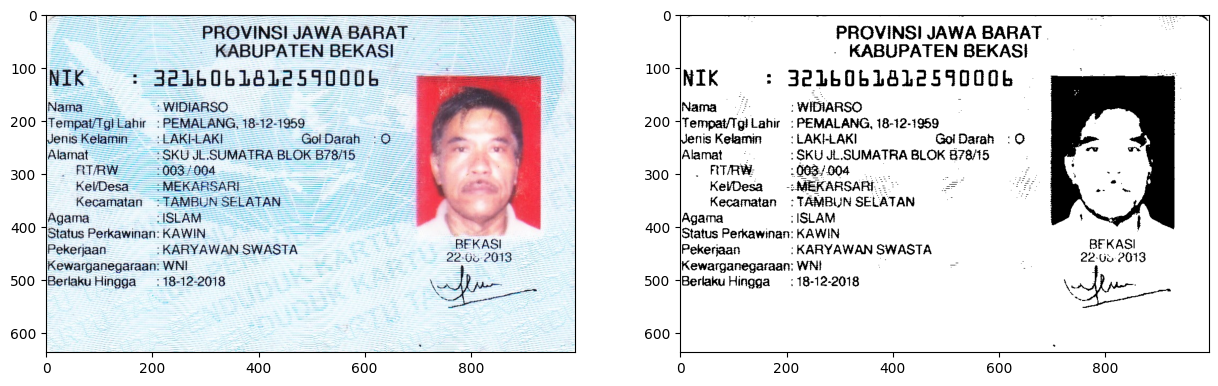

In [30]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

    7.Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek

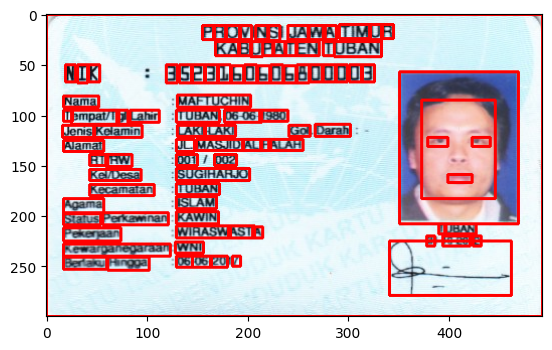

In [32]:
ktp = cv.imread("/content/drive/MyDrive/PCVK/Images/dataset/ktp/Salinan ktp3.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

      # cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

### **Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 – KTP Riyanto Sleman

Kelompok 2 – KTP Galang Raka Bengkulu

Kelompok 3 – KTP Arief Wijaya Cimahi

Kelompok 4 – KTP Edo Nias

Kelompok 5 – KTP Widiarso Bekasi

Kelompok 6 – KTP Abdurrauf Soppeng

Kelompok saya merupakan kelompok 3, dengan beberapa anggota:
1. Dhorifito
2. Josafat
3. Maidy
4. Nasyawa
5. Novita

Mengolah : KTP Arief Wijaya Cimahi

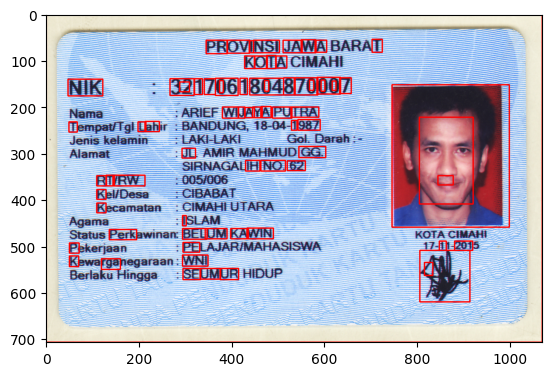

In [33]:
ktp_tugas = cv.imread("/content/drive/MyDrive/PCVK/Images/dataset/ktp/Salinan ktp2.png")

blurred = cv.GaussianBlur(ktp_tugas, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv.rectangle(ktp_tugas, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp_tugas, cv.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()